In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
print(df.dtypes)
df.nunique()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

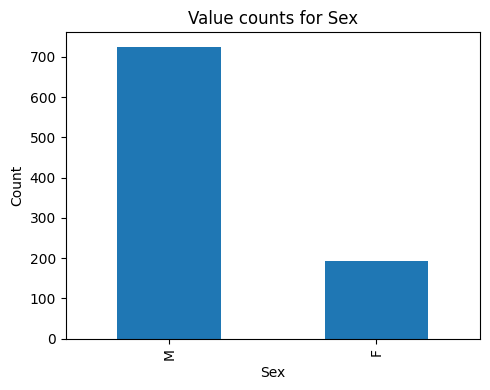

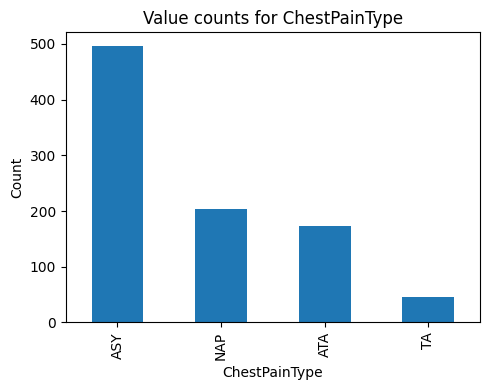

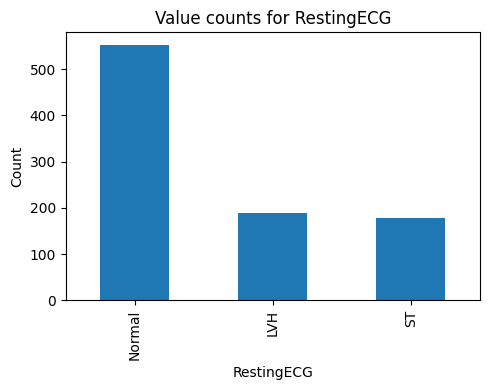

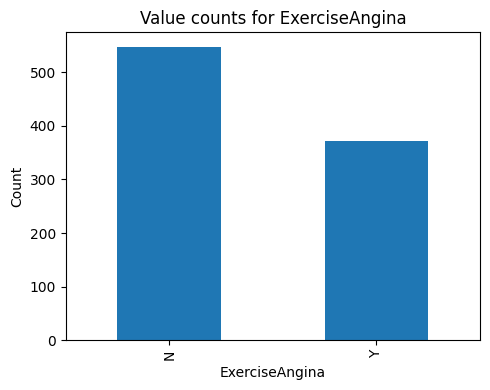

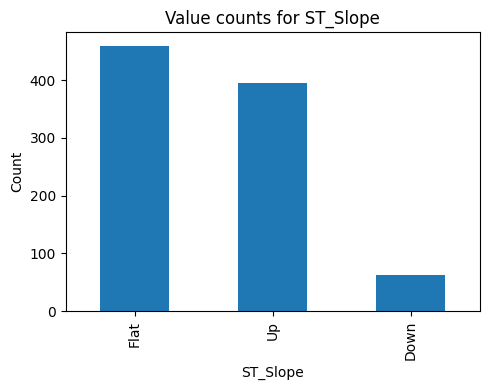

In [7]:
catergorical_col = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]

for c in catergorical_col:
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind='bar')
    plt.title(f'Value counts for {c}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [9]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [10]:
df[['Sex','ExerciseAngina']]

,Sex,ExerciseAngina
0,1,0
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,1,1
916,0,0


In [11]:
cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

df_encoded = pd.get_dummies(
    df,
    columns = cat_cols,
    dtype=int
)

In [12]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns='HeartDisease')
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size= .25,
    random_state=42
)
print(X_train.shape, y_train.shape)

(688, 18) (688,)


In [21]:
y_test.shape

(230,)

In [22]:
scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)
X_test_std = scaler_sd.transform(X_test)



In [24]:
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns=X_test.columns, index=X_test.index)
X_train_std_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.613176,-1.862131,-0.706137,0.487701,-0.532524,-1.046771,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,-1.038533,1.174999
270,-0.932852,0.537019,-0.706137,0.217601,-0.532524,0.152061,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
860,0.665526,0.537019,-0.166155,0.478387,-0.532524,0.311906,1.182037,0.441687,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
435,0.665526,0.537019,1.021807,-1.878000,-0.532524,-0.727083,1.182037,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,-1.038533,1.174999


In [25]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


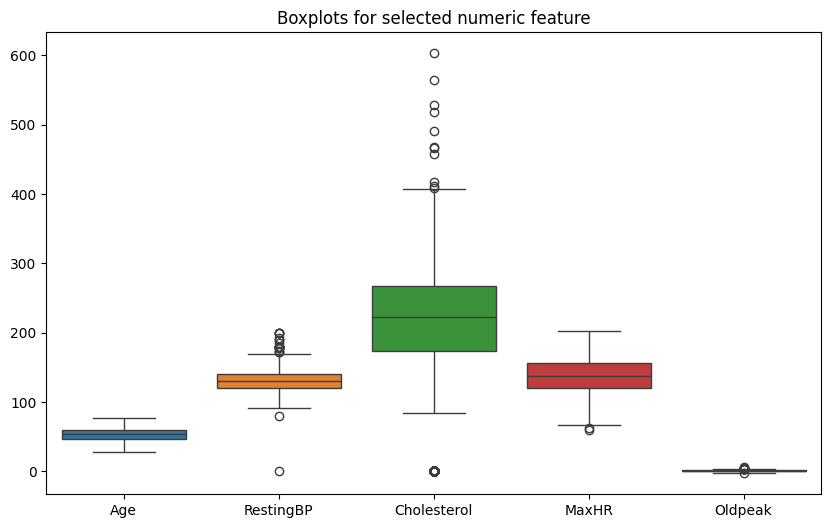

In [29]:
numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_encoded[numeric_cols])
plt.title("Boxplots for selected numeric feature")
plt.show()

In [32]:
Q1 = df_encoded['Cholesterol'].quantile(.25)
Q3 = df_encoded['Cholesterol'].quantile(.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
uper = Q3 + 1.5*IQR

outliers = df_encoded[(df_encoded['Cholesterol']<lower) | (df_encoded['Cholesterol']>uper)]
outliers['Cholesterol'].shape


(183,)

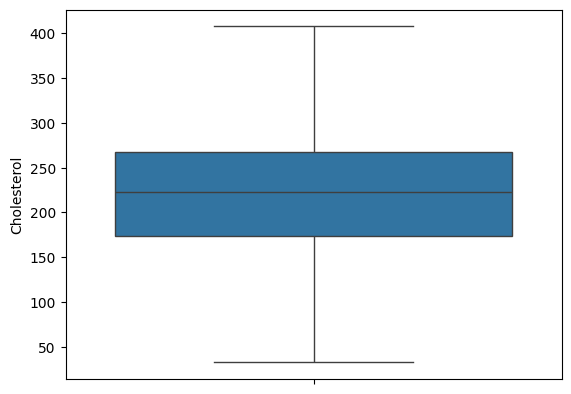

In [35]:
# Cap outliers 
df_capped = df_encoded.copy()
df_capped['Cholesterol'] = df_capped['Cholesterol'].clip(lower, uper)

sns.boxplot(df_capped['Cholesterol'])
plt.show()


In [ ]:
df_log = df_encoded.copy()
df_log['Cholesterol' + '_log'] = np.log(df_log['Cholesterol']+1)
df_log

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_log
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1,5.669881
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0,5.198497
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1,5.648974
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0,5.370638
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1,5.278115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0,5.579730
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0,5.267858
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0,4.882802
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0,5.468060


In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_cols = ['Age', 'MaxHR']
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(df_encoded[poly_cols])
poly_features_names = poly.get_feature_names_out(poly_cols)

poly_df = pd.DataFrame(poly_features, columns=poly_features_names)
poly_df

,Age,MaxHR,Age^2,Age MaxHR,MaxHR^2
0,40.0,172.0,1600.0,6880.0,29584.0
1,49.0,156.0,2401.0,7644.0,24336.0
2,37.0,98.0,1369.0,3626.0,9604.0
3,48.0,108.0,2304.0,5184.0,11664.0
4,54.0,122.0,2916.0,6588.0,14884.0
...,...,...,...,...,...
913,45.0,132.0,2025.0,5940.0,17424.0
914,68.0,141.0,4624.0,9588.0,19881.0
915,57.0,115.0,3249.0,6555.0,13225.0
916,57.0,174.0,3249.0,9918.0,30276.0


In [40]:
df_encoded['Age_bin'] = pd.cut(
    df_encoded['Age'],
    bins=[0,30,70,100],
    labels=['Young','Middle', 'Old']
)
print(df_encoded[['Age','Age_bin']].head(50))

    Age Age_bin
0    40  Middle
1    49  Middle
2    37  Middle
3    48  Middle
4    54  Middle
5    39  Middle
6    45  Middle
7    54  Middle
8    37  Middle
9    48  Middle
10   37  Middle
11   58  Middle
12   39  Middle
13   49  Middle
14   42  Middle
15   54  Middle
16   38  Middle
17   43  Middle
18   60  Middle
19   36  Middle
20   43  Middle
21   44  Middle
22   49  Middle
23   44  Middle
24   40  Middle
25   36  Middle
26   53  Middle
27   52  Middle
28   53  Middle
29   51  Middle
30   53  Middle
31   56  Middle
32   54  Middle
33   41  Middle
34   43  Middle
35   32  Middle
36   65  Middle
37   41  Middle
38   48  Middle
39   48  Middle
40   54  Middle
41   54  Middle
42   35  Middle
43   52  Middle
44   43  Middle
45   59  Middle
46   37  Middle
47   50  Middle
48   36  Middle
49   41  Middle


In [42]:
# domain driven risk categories for RestinBP and Oldpeak

def bp_risk(bp):
    if bp<120:
        return 'Normal'
    elif bp<140:
        return 'Elevated'
    else:
        return 'High'
    
def oldpeak_risk(op):
    if op==0:
        return 'NO strss'
    elif op<2:
        return 'Moderate stress'
    else:
        return 'High stress'
    
df_encoded['Bp_Risk'] = df_encoded['RestingBP'].apply(bp_risk)
df_encoded['Oldpeak_Risk'] = df_encoded['Oldpeak'].apply(oldpeak_risk)
df_encoded[['RestingBP','Bp_Risk','Oldpeak','Oldpeak_Risk']]

,RestingBP,Bp_Risk,Oldpeak,Oldpeak_Risk
0,140,High,0.0,NO strss
1,160,High,1.0,Moderate stress
2,130,Elevated,0.0,NO strss
3,138,Elevated,1.5,Moderate stress
4,150,High,0.0,NO strss
...,...,...,...,...
913,110,Normal,1.2,Moderate stress
914,144,High,3.4,High stress
915,130,Elevated,1.2,Moderate stress
916,130,Elevated,0.0,NO strss


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
cat_features = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first'))
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat',cat_pipeline, cat_features)
])

clf = Pipeline([
    ('prep', preprocess),
    ('model',LogisticRegression())
])

In [44]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

clf.fit(X_train_pipe, y_train_pipe)

from sklearn.metrics import accuracy_score

y_pred_pipe = clf.predict(X_test_pipe)
acc = accuracy_score(y_test_pipe, y_pred_pipe)
print(acc)

0.8434782608695652
